In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.linear_model import LinearRegression

In [36]:
# importing old car data
path=r"C:\Users\HP\Desktop\CODE\DATA ANALYSIS with PYTHON\cleaned_data_for 2.1(old car data).csv"
df=pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower_binned
0,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,11.190476,low
1,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,11.190476,low
2,1,122.0,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,12.368421,medium
3,2,164.0,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,9.791667,low
4,2,164.0,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,13.055556,low


## Important notes:
### 1.Our Target variable/response variable/output variable is 'PRICE'(We want to predict price of a car based on some features)
### 2.from EDA we have concluded that the variables- 'horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses' are most correlated to the PRICE

## SLR(SIMPLE LIEAR REGRESSION):---------------------------------------------

In [37]:
# predictor variale:
x=df[['engine-size']]#NOTE-This always has te be a DATAFRAME not series compulsorily

#target varibale/response variable:
y=df['price']#this can be a series


In [38]:
#creating a linear regression model object
lm=LinearRegression()

#training the simple linear regression model/fitting the model:
lm.fit(x,y)#Model prepared

LinearRegression()

In [39]:
#finding coefficient using regression object:
lm.coef_
#+ve coef

array([166.86001569])

In [40]:
#finding intercept using regression object:
lm.intercept_
#negative intercept shows the line cuts below the 0 mark on y axis

np.float64(-7963.338906281024)

In [41]:
#equation of our line is:
#NOTE Yhat=166.86 -7963.33*x


In [42]:
#predicitng using our line:
yhat=lm.predict(x)#NOTE-we cannot input a number in place of x,it has to be a '2D'obj
yhat[0:5]#to show 5 results only

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408,
       14729.62322775])

## MLR(Multiple linear regression):-----------------------------------------------

In [43]:
# we choose 'horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses' varibales for model building and  predicting price

In [44]:
z=df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses']]#This has to be a data frame compulsorily


In [45]:
#fitting our MLR line/training our model:
lm1=LinearRegression()
lm1.fit(z,df['price'])

LinearRegression()

In [46]:
# coefficients:
lm1.coef_
#5 coefficients as we used 5 variables to train

array([52.98719059,  4.72204233, 81.69049189, 36.84220503,  1.75549613])

In [47]:
#intercept:
lm1.intercept_
#-ve intercept

np.float64(-16049.268848908869)

In [50]:
#equation of our MLR fitted line is:

# Yhat= -15806 +53.59*x1 +4.7*x2 + 81.5*x3 + 36.05*x4 +1.7*x5

In [51]:
# prediction
yhat1=lm1.predict(z)# cannot pass a single series here ,we have to predict using all the variables that we have used to train our model
yhat1[0:5]

array([13692.74717232, 13692.74717232, 19030.10662502, 10688.26864816,
       15587.64238133])

---------------------------------------------------------END OF SLR ,MLR----------------------------------------------

## Evaluation using visualtion(regplot,residualplot,distribution plot)--------------
### 1. Regplot and residualplot for-SLR
### 2. Distribution plot for MLR

## Regplot for engine size:

<Axes: xlabel='engine-size', ylabel='price'>

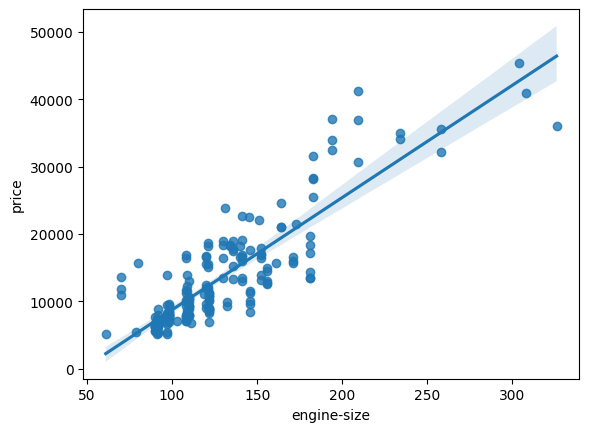

In [55]:
# for engine size and price(SLR)
sns.regplot(x='engine-size',y='price',data=df)

## Residual plot for engine-size:

<Axes: xlabel='engine-size', ylabel='price'>

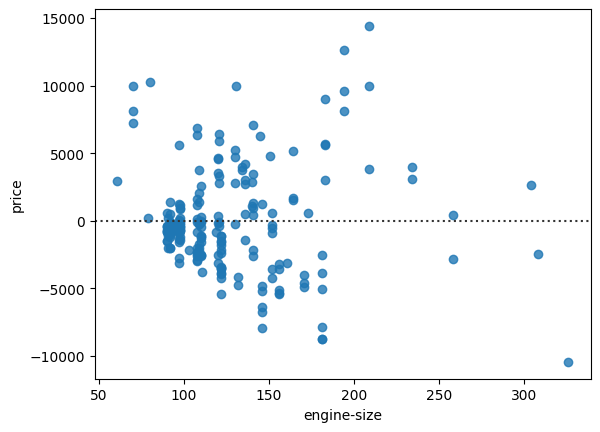

In [58]:
# for engine size and price(SLR)
sns.residplot(x=df['engine-size'],y=df['price'])#NOTE- the syntax is a bit different here

#no curvature
#points randomly distributed along x axis
# consistent variance all along
#ACCEPTED

## Regplot plot for highway-mpg:

<Axes: xlabel='highway-mpg', ylabel='price'>

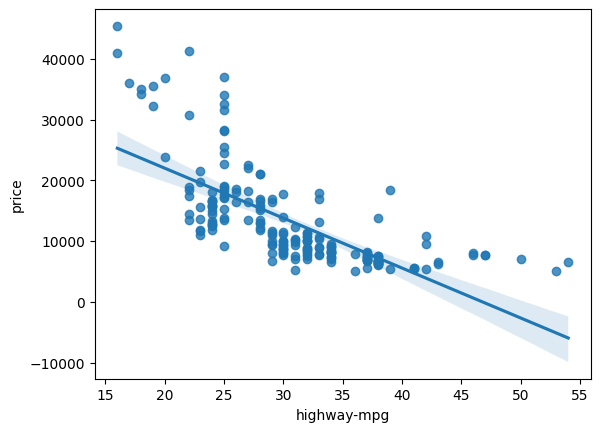

In [59]:
sns.regplot(x='highway-mpg',y='price',data=df)

## Residual plot for highway-mpg:

<Axes: xlabel='highway-mpg', ylabel='price'>

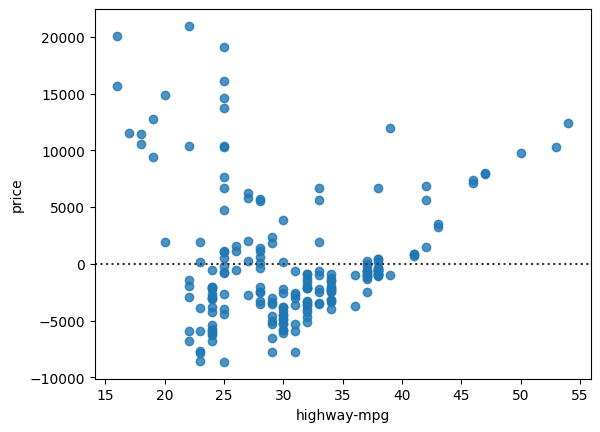

In [62]:
# for engine size and price(SLR)
sns.residplot(x=df['highway-mpg'],y=df['price'])#NOTE- the syntax is a bit different here

# curvature seen
#points NOT randomly distributed along x axis
# variance not consistent all along
#MODEL REJECTED:Cant use a linear model for a SLR model built over highway-mpg and price;rather use polynomial regression

## Distribution plot for MLR:

C:\Users\HP\AppData\Local\Temp\ipykernel_10812\2503633189.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1=sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
C:\Users\HP\AppData\Local\Temp\ipykernel_10812\2503633189.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distp

<Axes: xlabel='price', ylabel='Density'>

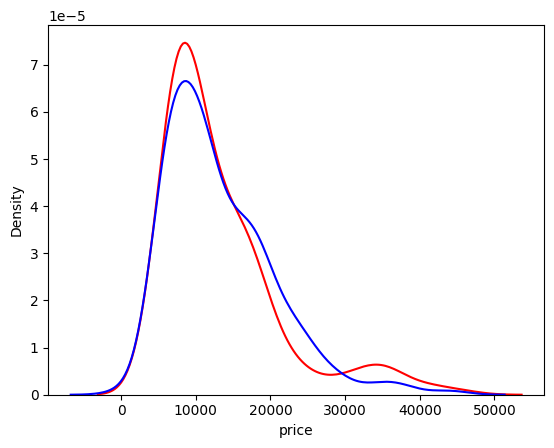

In [69]:
ax1=sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(yhat1, hist=False, color="b", label="Fitted Values" , ax=ax1)#yhat1 are the predictions we got from MLR

#the predicted and actual values mostly overlap-hence MLR accepted


In [70]:
# if using regplot, residual plot or distribution plot, the SLR or MLR(i.e. any linear model) dosent fit well on our data, 
# then we do POLYNOMIAL REGRESSION

## Polynomial regression:

In [72]:
# as the residual plot of highway-mpg vs price had curvature ,a linear model dosent fit; now using a polynomial equation to fit in it

In [ ]:
predictor=df['highway-mpg']#NOTE-This has to be 1D i.e. series only
target=df['price']

#training a polynomial regression model of degree =3
func=np.polyfit(predictor,target,3)#3 for fitting a 3rd order polynomial equation in our data


In [90]:
#getting the equation:
eq=np.poly1d(func)
print(eq)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


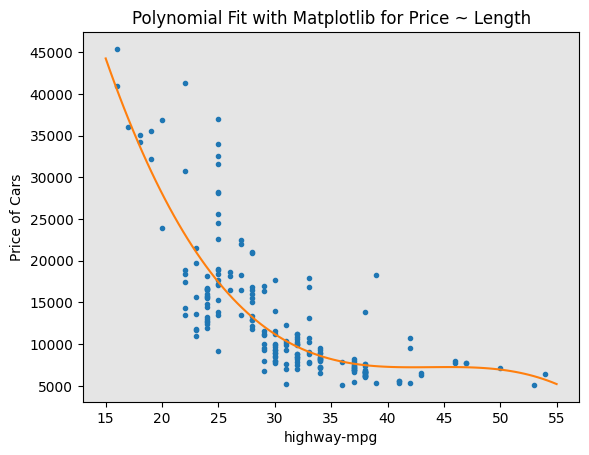

In [91]:
# Plotting the polynomial

#learn more on this-how to plot a polynomial graphically-not done

def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

PlotPolly(eq, predictor, target, 'highway-mpg')

## Fitting polynomial with more than 1 predictor variables:

In [93]:
from sklearn.preprocessing import PolynomialFeatures

In [95]:
pr=PolynomialFeatures(degree=2)# creating a polynomial object of degree 2
pr

PolynomialFeatures()

In [97]:
Z_pr=pr.fit_transform(z)

In [98]:
Z_pr

array([[1.0000e+00, 1.1100e+02, 2.5480e+03, ..., 7.2900e+02, 3.2940e+03,
        1.4884e+04],
       [1.0000e+00, 1.1100e+02, 2.5480e+03, ..., 7.2900e+02, 3.2940e+03,
        1.4884e+04],
       [1.0000e+00, 1.5400e+02, 2.8230e+03, ..., 6.7600e+02, 3.1720e+03,
        1.4884e+04],
       ...,
       [1.0000e+00, 1.3400e+02, 3.0120e+03, ..., 5.2900e+02, 2.1850e+03,
        9.0250e+03],
       [1.0000e+00, 1.0600e+02, 3.2170e+03, ..., 7.2900e+02, 2.5650e+03,
        9.0250e+03],
       [1.0000e+00, 1.1400e+02, 3.0620e+03, ..., 6.2500e+02, 2.3750e+03,
        9.0250e+03]])

## In-Sample evaluaiton:(R^2 and MSE)

### R^2(R-squared):

In [ ]:
#for SLR
# first fit a model using lm.fit(x,y) then use:
lm.score(x,y)
#The value is near 1,implies the model is good

0.7609686443622008

In [104]:
#For MLR:
lm1.score(z,df['price'])
#near1 ,implies , a good fitted model

0.8094030198667646

In [123]:
#For polynomial regression:

from sklearn.metrics import r2_score

r_squared = r2_score(y, eq(x))
print('The R-square value is: ', r_squared)


The R-square value is:  -324900.2193727102


### MSE(Mean squared error):

In [110]:
from sklearn.metrics import mean_squared_error

In [ ]:
#for slr
mse=mean_squared_error(y,yhat)
print(mse)

15021126.02517414


In [120]:
#for mlr
mse1=mean_squared_error(y,yhat1)
print(mse1)

11977429.701470532


In [ ]:
#for polynormial regression
mean_squared_error(df['price'], eq(x))

np.float64(20417330391270.527)

## Predicting values using trained models:

#### Using np.arange function

In [125]:
new_inputs=np.arange(1,101,1).reshape(-1,1)


In [126]:
yhat_predictions=lm.predict(new_inputs)

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [127]:
yhat_predictions[0:5]

array([-7796.47889059, -7629.6188749 , -7462.75885921, -7295.89884352,
       -7129.03882782])

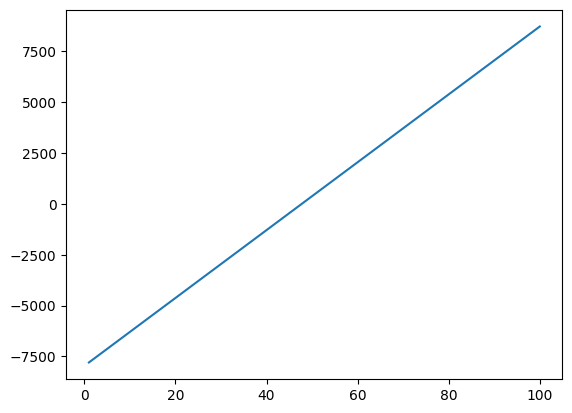

In [128]:
#plotting our predictions:

plt.plot(new_inputs,yhat_predictions)

## Decision making:

Compare values of R^2 and Mse for SLR,MLR and Polynomial Regression models
Choose the model with most optimal SLR and MLR for prediction(as all the models predict,we have to choose the best)
(here MLR gave the most optimal values for r squared and mse and hence the most optimal model)